In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [2]:
def calcular_erro(alpha, X, Y, A):
    erro = 0
    N = len(X)
    for n in range(N):
        p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        if(1 - p_chapeu)<np.e**-12:
            erro -= np.e**-12
        else:
            erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
    erro = erro/N
    return erro if erro > np.e**-12 else np.e**-12

In [3]:
def batche(lista, n):
    # Seleciona aleatoriamente n índices únicos da lista
    indices_aleatorios = random.sample(range(len(lista)), n)
    return indices_aleatorios

In [4]:
def CLogDKPd(X, Y, alpha, eta,epochs,d,batch_size):
    t=0
    E=[]
    N=len(X)
    A=np.dot(X,X.T)
    A=A**d
    
    for epoca in range(epochs):
        S=[]
        ordem =batche(X, batch_size)
        for i in ordem:
            p_chapeu=sigmoid(sum(alpha * (A[i])))
            S.append((p_chapeu-Y[i]) *(A[i]))
        S=np.array(np.sum(S,axis=0))
        alpha = alpha - eta * S
        E.append(calcular_erro(alpha, X, Y, A))
        print(alpha)
    return alpha, E

In [5]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 500
alpha = np.zeros(len(X))
d=2
batch_size = 4
alpha, E = CLogDKPd(X, Y, alpha, eta, epochs, d, batch_size)



[0.  0.  0.  0.1]
[-0.0433304  -0.13622155 -0.13622155 -0.0713026 ]
[0.04832342 0.13183473 0.13183473 0.5441675 ]
[-0.11102686 -0.3108916  -0.3108916  -0.1814406 ]
[0.04215876 0.11284293 0.11284293 0.70997728]
[-0.12426763 -0.34412387 -0.34412387 -0.0373995 ]
[0.0179659  0.0505804  0.0505804  0.80204596]
[-0.14753135 -0.40579857 -0.40579857  0.05488131]
[-0.00632306 -0.01737417 -0.01737417  0.88009097]
[-0.16981555 -0.47130363 -0.47130363  0.13580848]
[-0.02756185 -0.08392299 -0.08392299  0.9559318 ]
[-0.18906442 -0.53540394 -0.53540394  0.21454625]
[-0.04605277 -0.14980743 -0.14980743  1.02812607]
[-0.20545252 -0.59861387 -0.59861387  0.28997945]
[-0.06166694 -0.21469854 -0.21469854  1.0971528 ]
[-0.21890064 -0.66067985 -0.66067985  0.36248488]
[-0.07441276 -0.27854885 -0.27854885  1.16305021]
[-0.22942204 -0.72155306 -0.72155306  0.43210796]
[-0.08429324 -0.34125441 -0.34125441  1.22600613]
[-0.23703776 -0.78115152 -0.78115152  0.49901027]
[-0.09134691 -0.40276483 -0.40276483  1.2861

In [6]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    


0.7516547290539023
1
0.13557086619231767
0
0.13557086619231767
0
0.903513955416501
1


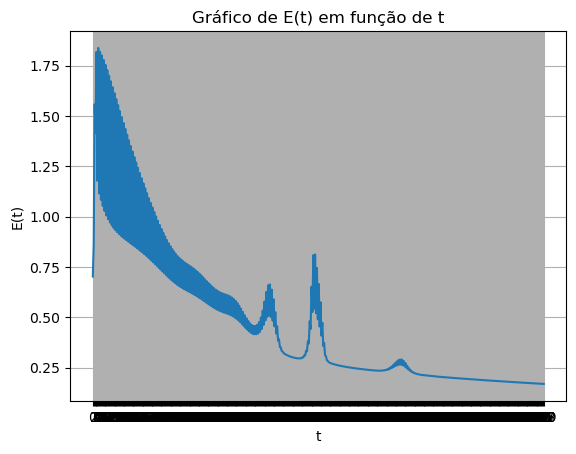

In [7]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

# MNIST

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# carregar dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

# Filtrar dataset apenas para digito de 0 a 4
train_filter = np.where(y_train_original < 2)
test_filter = np.where(y_test_original < 2)

x_train_filter, y_train_filter = x_train_original[train_filter], y_train_original[train_filter]
x_test_filter, y_test_filter = x_test_original[test_filter], y_test_original[test_filter]

In [9]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [10]:
x_train, y_train = select_first_n_per_class(x_train_filter, y_train_filter, n=100)
x_test, y_test = select_first_n_per_class(x_test_filter, y_test_filter, n=100)

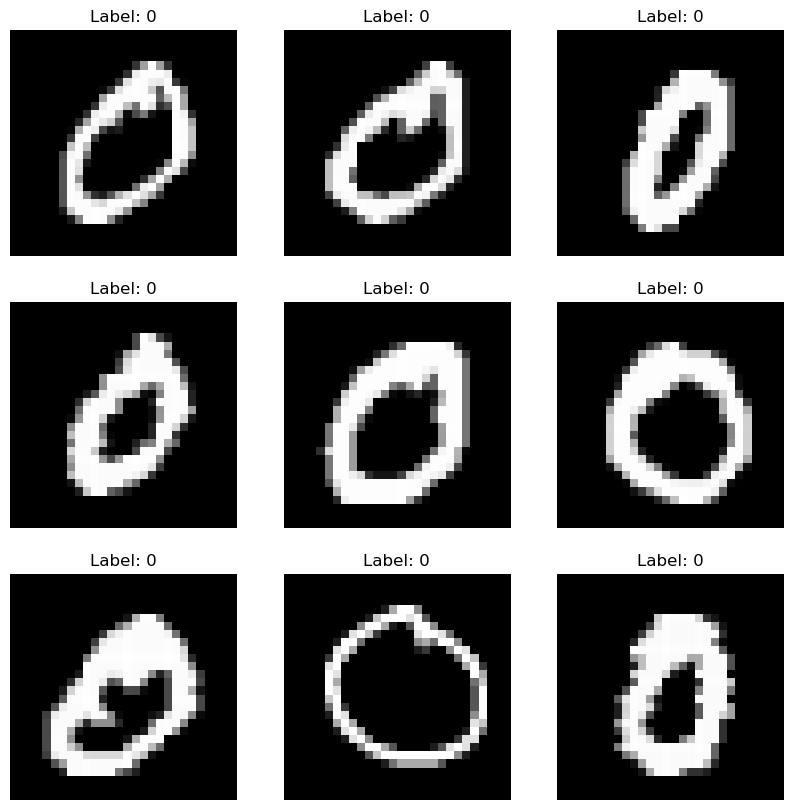

In [11]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


plot_images(x_train, y_train)

In [12]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

X shape: (200, 784)


In [13]:
eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 200
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)

[-1.11483367e+14 -1.19482249e+14 -9.21948872e+13 -1.24668271e+14
 -1.66433120e+14 -1.35035156e+14 -1.45664386e+14 -2.91375447e+13
 -1.38564721e+14 -1.06024220e+14 -1.29046319e+14 -9.50604189e+13
 -1.40001522e+14 -4.33793081e+13 -1.34605684e+14 -6.70262404e+13
 -1.68877611e+14 -1.29121414e+14 -6.37804321e+13 -1.22087683e+14
 -1.08266521e+14 -9.25211369e+13 -1.08517776e+14 -2.85888458e+13
 -5.60959932e+13 -9.57179515e+13 -2.23815758e+13 -6.70429841e+13
 -2.38604454e+13 -7.96763661e+13 -1.47454029e+13 -1.44117141e+14
 -1.84977329e+14 -9.46732595e+13 -1.85973409e+14 -1.08302592e+14
 -9.12001493e+13 -1.17512444e+14 -1.88915462e+14 -2.19872244e+14
 -1.51924385e+14 -1.16904514e+14 -1.12532413e+14 -1.10506279e+14
 -9.53516546e+13 -1.40945325e+14 -1.50532262e+14 -9.92790331e+13
 -9.80519810e+13 -4.83907338e+13 -1.51951883e+14 -7.60480583e+13
 -1.34928604e+14 -5.43824774e+13 -1.08955427e+14 -1.33277399e+14
 -6.95613910e+13 -9.58103353e+13 -1.01335207e+14 -8.87776199e+13
 -9.84159124e+13 -1.38929

C:\Users\User\AppData\Local\Temp\ipykernel_10036\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_10036\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_10036\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-4.05062771e+13 -2.71275436e+13  2.50454133e+13 -1.83890168e+13
 -7.00544494e+13 -6.26280300e+13 -2.25385610e+13 -1.47799392e+13
 -2.29866052e+13 -1.98598499e+13 -3.35062689e+13 -4.82680568e+13
 -3.42353922e+13 -1.95655213e+13 -5.64836378e+13 -2.76234062e+13
 -5.54661176e+13 -4.79069088e+13 -2.52908023e+13 -9.72548683e+12
 -5.32753558e+13 -4.14095175e+13 -5.36039460e+13 -1.60705382e+13
 -2.17967434e+13 -4.73352695e+13 -4.06805088e+12 -2.41140806e+13
 -1.16120150e+13 -3.76083490e+13 -4.10929743e+12 -8.04401785e+13
 -8.87666015e+13 -4.78696118e+13 -8.29305729e+13 -2.80361533e+13
 -3.80657169e+13 -5.26225470e+13 -6.89059433e+13 -8.07724254e+13
 -7.98555737e+13 -5.52752766e+13 -3.37106169e+13 -1.45817820e+13
 -4.33997081e+13 -8.39370124e+13 -6.53881902e+13 -4.60943559e+13
 -4.04534726e+13 -2.05709768e+13 -6.14148363e+13 -3.71182639e+13
 -6.96205300e+13 -1.85837432e+13 -2.11206176e+13 -6.20827278e+13
 -1.73792519e+13 -2.81696849e+13 -4.20632933e+13 -4.39454074e+13
 -2.59202913e+13 -5.93361

In [14]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0


C:\Users\User\AppData\Local\Temp\ipykernel_10036\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [15]:
len(y_test)

200

In [16]:
from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

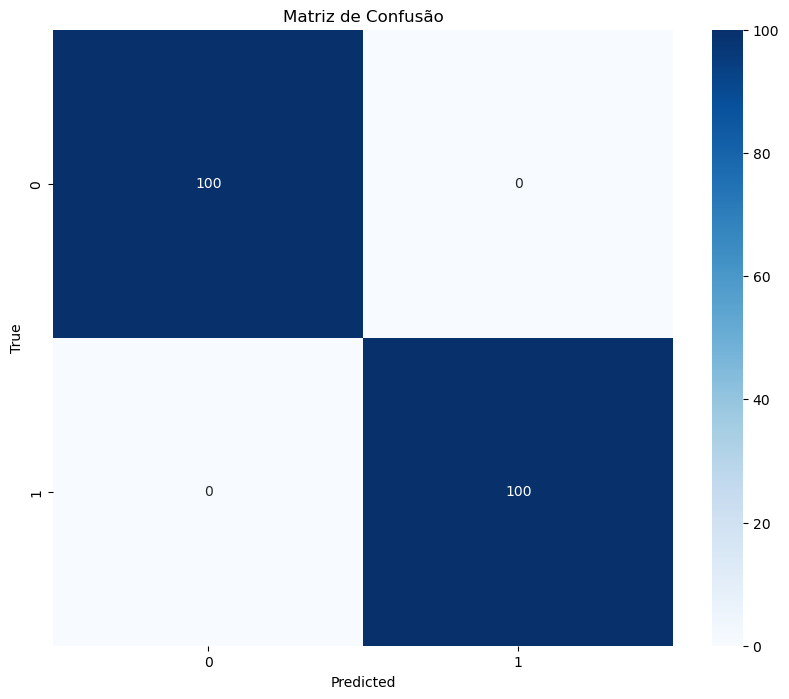

In [17]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

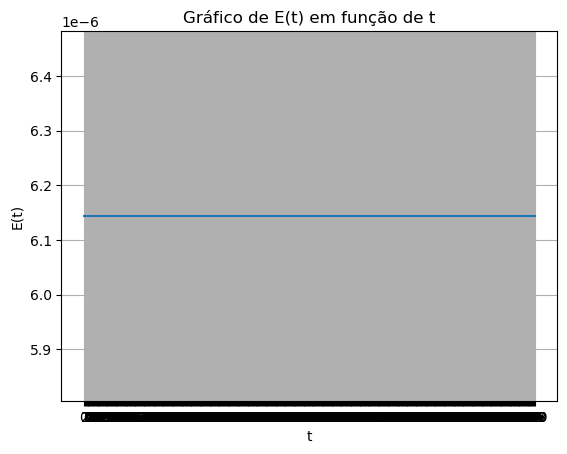

In [18]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

#### Agora vamos testar para vários tamanhos do dataset

In [19]:
x_train, y_train = select_first_n_per_class(x_train_filter, y_train_filter, n=50)
x_test, y_test = select_first_n_per_class(x_test_filter, y_test_filter, n=50)

In [21]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 100
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)

X shape: (100, 784)
[-5.74192500e+13 -6.19916663e+13 -4.29525838e+13 -5.85388020e+13
 -9.25072789e+13 -8.03007051e+13 -7.60424966e+13 -1.97995140e+13
 -7.31674187e+13 -5.35621219e+13 -6.33244945e+13 -5.88696823e+13
 -7.25673816e+13 -2.86182122e+13 -7.96323343e+13 -3.83232843e+13
 -8.32661703e+13 -8.30451808e+13 -3.74211567e+13 -6.24829577e+13
 -5.78455716e+13 -5.79437393e+13 -6.99622197e+13 -1.71149948e+13
 -3.07500532e+13 -5.93212788e+13 -1.12766831e+13 -3.83088643e+13
 -1.60857682e+13 -5.18343203e+13 -9.17924269e+12 -8.89876958e+13
 -1.02388732e+14 -5.21621429e+13 -9.75512986e+13 -5.85492416e+13
 -4.98950042e+13 -6.56923720e+13 -9.29565057e+13 -1.12798634e+14
 -9.47860779e+13 -7.27038894e+13 -7.05410378e+13 -5.60238051e+13
 -4.78362846e+13 -8.64711973e+13 -8.74850864e+13 -6.28943351e+13
 -4.61082355e+13 -2.69954780e+13  7.63303297e+12  5.42685476e+12
  3.68271347e+12  4.59652517e+12  7.27102259e+12 -5.73606514e+12
  7.36403600e+12  7.43753279e+12  8.29324473e+12 -2.74852479e+12
  5.0

C:\Users\User\AppData\Local\Temp\ipykernel_10036\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_10036\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_10036\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-1.57127095e+13 -8.23722063e+12  1.99934310e+13 -4.27449385e+10
 -3.31861808e+13 -3.77269864e+13 -5.85976932e+12 -1.14349339e+13
 -7.97078926e+12 -4.56337995e+12 -8.45934638e+12 -3.02468691e+13
 -1.03660703e+13 -1.47032843e+13 -3.25005205e+13 -1.46328867e+13
 -1.73320973e+13 -3.29020327e+13 -1.30561446e+13  1.05682856e+12
 -2.48626840e+13 -2.59081650e+13 -3.61971547e+13 -9.45623925e+12
 -1.13512251e+13 -2.93452166e+13 -4.91001905e+11 -1.14214867e+13
 -8.69443194e+12 -2.60426977e+13 -2.80203359e+12 -4.96908249e+13
 -4.35137314e+13 -2.41510764e+13 -3.62831560e+13 -1.03023021e+13
 -1.77020132e+13 -2.65047987e+13 -2.39955141e+13 -3.15596842e+13
 -4.97931017e+13 -3.48176891e+13 -2.51379308e+13 -7.61617187e+11
 -1.73592508e+13 -5.09788507e+13 -3.68777171e+13 -3.17796402e+13
 -1.20942917e+13 -1.02029015e+13  4.33538931e+13  5.10029329e+13
  2.49694618e+13  2.88854147e+13  4.14380986e+13  4.41831839e+13
  4.25997141e+13  4.39773694e+13  4.28743792e+13  5.55697209e+13
  2.84501377e+13  4.83902

In [23]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1


C:\Users\User\AppData\Local\Temp\ipykernel_10036\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [24]:

from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

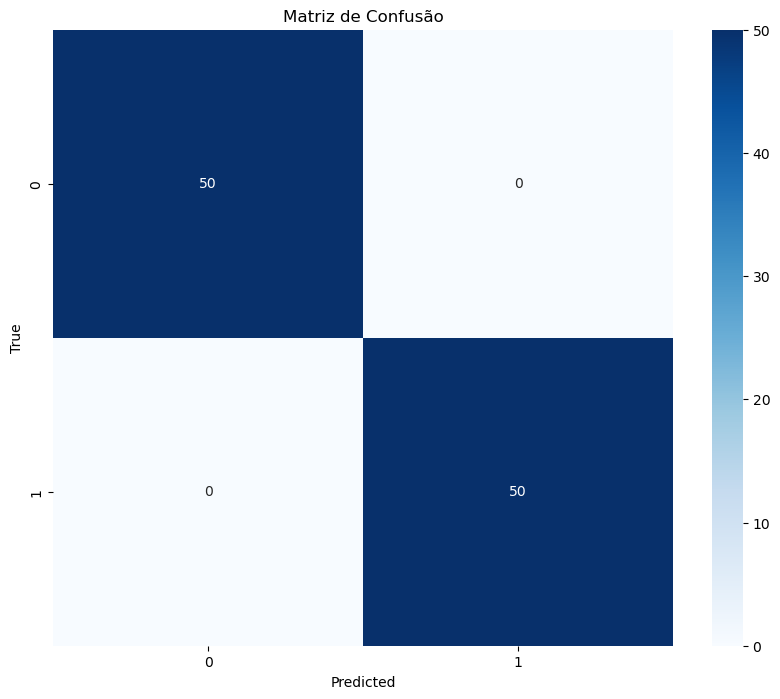

In [25]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

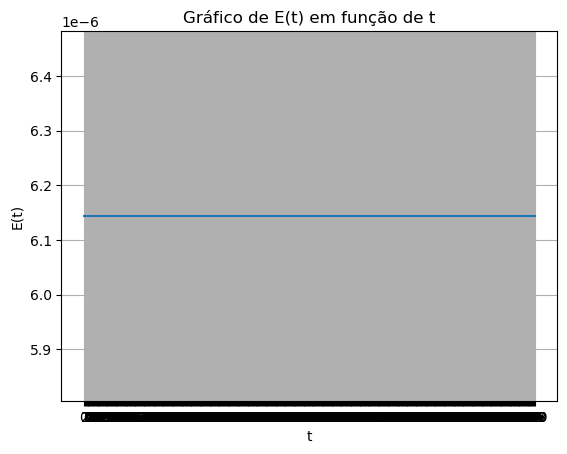

In [26]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [27]:
x_train, y_train = select_first_n_per_class(x_train_filter, y_train_filter, n=20)
x_test, y_test = select_first_n_per_class(x_test_filter, y_test_filter, n=20)

In [28]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 40
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)

A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

X shape: (40, 784)
[-2.61977843e+13 -2.89278106e+13 -2.43072185e+13 -2.99905319e+13
 -4.11263671e+13 -3.25318208e+13 -3.81134181e+13 -7.53023268e+12
 -3.67591319e+13 -2.88934005e+13 -3.29800787e+13 -2.26175914e+13
 -3.53016658e+13 -1.03543934e+13 -3.26635283e+13 -1.63725988e+13
 -3.79882979e+13 -3.06710724e+13 -1.48686389e+13 -3.20115971e+13
  2.41088463e+12  1.52727231e+12  1.12759302e+12  1.43523997e+12
  2.30482746e+12 -3.29487090e+12  1.85017867e+12  2.08797788e+12
  2.28865632e+12 -1.50119737e+12  1.61955014e+12  2.27871031e+12
  2.76975242e+12  1.83930008e+12  1.43057879e+12  7.01975429e+11
  2.52201665e+12  1.68283170e+12  2.27124602e+12  1.11324496e+12]
[-2.16445789e+13 -2.21975214e+13 -1.42603998e+13 -2.12719900e+13
 -3.58476289e+13 -2.81162406e+13 -2.86076510e+13 -6.51241285e+12
 -2.84107268e+13 -2.23631801e+13 -2.66894249e+13 -1.99542322e+13
 -2.87064452e+13 -8.91916399e+12 -2.82509490e+13 -1.41554418e+13
 -3.02223049e+13 -2.58738377e+13 -1.30231260e+13 -2.39609971e+13
  1.2

C:\Users\User\AppData\Local\Temp\ipykernel_10036\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_10036\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_10036\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-1.17065604e+13 -8.96760571e+12  2.47999863e+12 -4.57589418e+12
 -2.48376488e+13 -1.92437860e+13 -1.22202470e+13 -4.88921503e+12
 -1.27475494e+13 -1.08937384e+13 -1.45426759e+13 -1.41399007e+13
 -1.49234225e+13 -6.42143352e+12 -1.75544179e+13 -9.21854149e+12
 -1.44010332e+13 -1.56946134e+13 -8.69015932e+12 -8.32502707e+12
  2.43295489e+13  2.27581780e+13  1.19090586e+13  1.40655419e+13
  2.28003837e+13  2.46720053e+13  2.00538516e+13  2.42758999e+13
  2.24994960e+13  2.60032901e+13  1.40563471e+13  2.71187504e+13
  3.28238154e+13  1.70375813e+13  1.46405973e+13  9.81499203e+12
  3.24722026e+13  1.62135655e+13  3.35161685e+13  1.07394340e+13]
[-1.17065604e+13 -8.96760571e+12  2.47999863e+12 -4.57589418e+12
 -2.48376488e+13 -1.92437860e+13 -1.22202470e+13 -4.88921503e+12
 -1.27475494e+13 -1.08937384e+13 -1.45426759e+13 -1.41399007e+13
 -1.49234225e+13 -6.42143352e+12 -1.75544179e+13 -9.21854149e+12
 -1.44010332e+13 -1.56946134e+13 -8.69015932e+12 -8.32502707e+12
  2.43295489e+13  2.2758

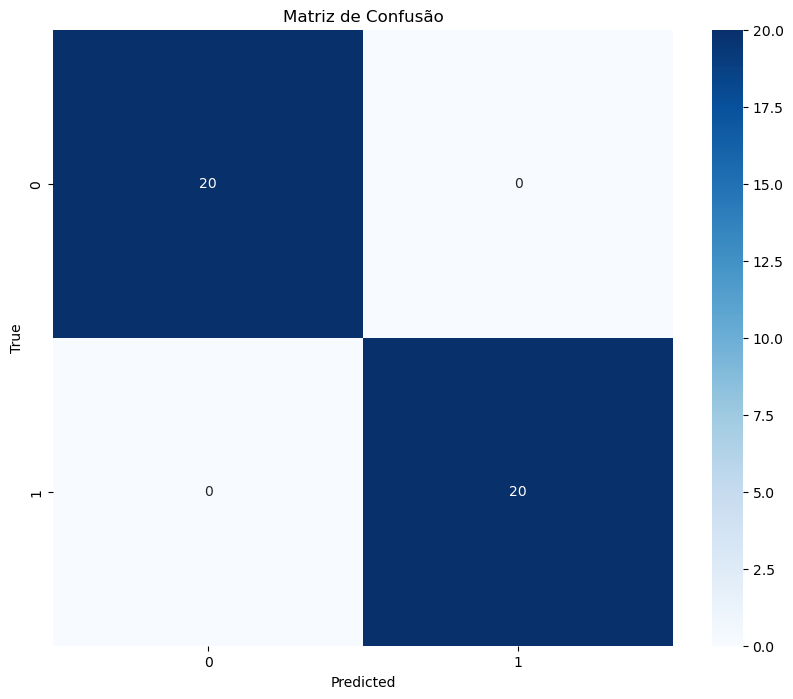

In [29]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

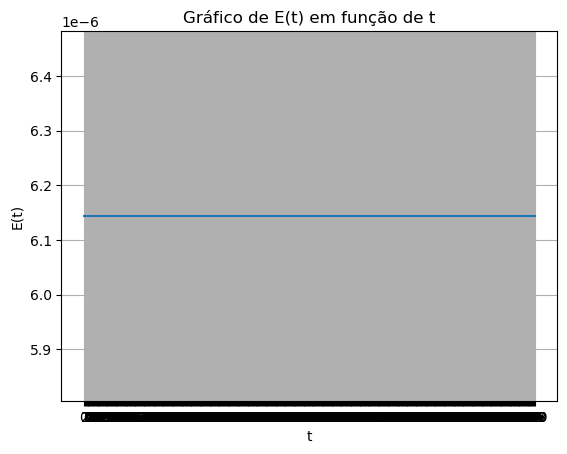

In [30]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()